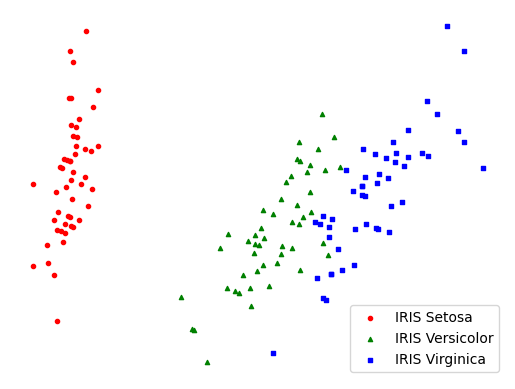

In [18]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [19]:
from knn_model import k_nearest_neighbor_predict
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data to meet the requirements
X_train, X_test, y_train, y_test = [], [], [], []

np.random.seed(42)

for species in range(3):
    species_indices = np.where(y == species)[0]
    X_species = X[species_indices]
    y_species = y[species_indices]
    
    train_indices = np.random.choice(len(X_species), 40, replace=False)
    test_indices = np.setdiff1d(range(len(X_species)), train_indices)[:10]
    
    X_train.extend(X_species[train_indices])
    X_test.extend(X_species[test_indices])
    y_train.extend(y_species[train_indices])
    y_test.extend(y_species[test_indices])

X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])

# Use our K-NN Model with k = 11
y_pred = k_nearest_neighbor_predict(X_train, y_train, X_test, k=11)

# Print out evaluation metrics for multiclass
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision (macro):", precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall (macro):", recall)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9666666666666667
Precision (macro): 0.9696969696969697
Recall (macro): 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
